In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = sns.load_dataset('iris')

In [4]:
df = df[df['species'] != 'setosa']

In [5]:
df['species'].unique()

array(['versicolor', 'virginica'], dtype=object)

In [7]:
X = df.drop('species',axis= 1)
y = df['species']

In [8]:
X

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
y

50     1
51     1
52     1
53     1
54     1
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 100, dtype: int64

In [6]:
df['species'] = df['species'].map({'versicolor' : 1, 'virginica' : 2})

In [15]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 100, dtype: object

In [10]:
from sklearn.model_selection import train_test_split


In [11]:
X_train , X_test, y_train , y_test = train_test_split(X,y, test_size= 0.2,random_state= 32)

In [12]:
from sklearn.linear_model import LogisticRegression
regression = LogisticRegression()

In [13]:
from sklearn.model_selection import GridSearchCV

parameter = {'C' : [0.5,1,2,3,5,6,7,9,10,30,40,50,100], 'penalty' : ['l1','l2','elasticnet']}

model = GridSearchCV(regression,parameter,scoring= 'accuracy', cv= 5)

In [14]:
model.fit(X_train,y_train)

c:\Users\adhab\OneDrive\Desktop\VsCode\DataScience\ML\mlvenv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
130 fits failed out of a total of 195.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
65 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\adhab\OneDrive\Desktop\VsCode\DataScience\ML\mlvenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\adhab\OneDrive\Desktop\VsCode\DataScience\ML\mlvenv\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.5, 1, 2, 3, 5, 6, 7, 9, 10, 30, 40, 50, 100],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [15]:
model.best_params_

{'C': 0.5, 'penalty': 'l2'}

In [16]:
model.best_estimator_

LogisticRegression(C=0.5)

In [17]:
model.best_score_

np.float64(0.975)

In [18]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,0.553855,0.828479,0.593709,0.494305
sepal_width,0.553855,1.000000,0.519802,0.566203,0.308080
petal_length,0.828479,0.519802,1.000000,0.823348,0.786424
petal_width,0.593709,0.566203,0.823348,1.000000,0.828129
species,0.494305,0.308080,0.786424,0.828129,1.000000


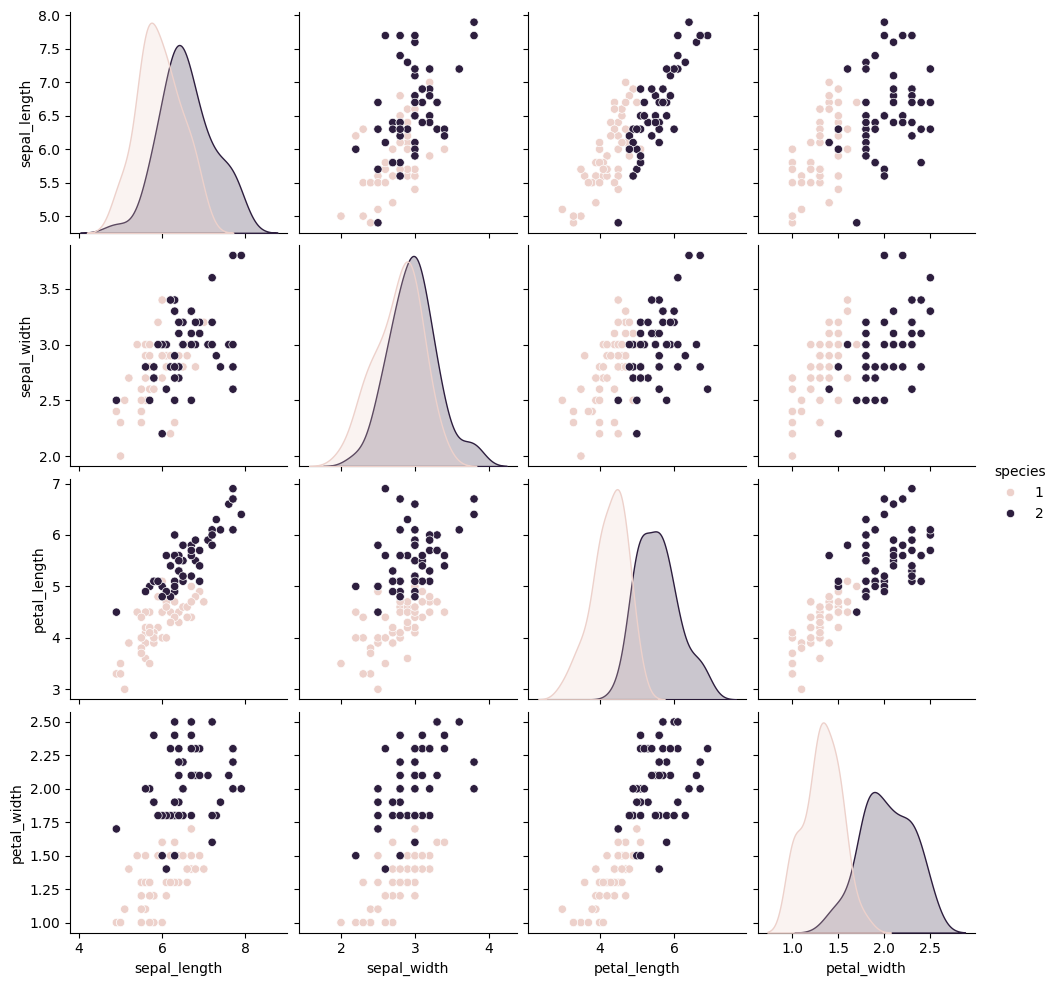

In [19]:
sns.pairplot(df,hue='species')

In [26]:
pred = model.predict(X_test)

In [27]:
pred

array(['setosa', 'setosa', 'virginica', 'virginica', 'virginica',
       'setosa', 'virginica', 'setosa', 'setosa', 'virginica', 'setosa',
       'setosa', 'virginica', 'setosa', 'setosa', 'virginica', 'setosa',
       'virginica', 'virginica', 'setosa'], dtype=object)

In [28]:
y_test

22        setosa
39        setosa
135    virginica
147    virginica
105    virginica
33        setosa
130    virginica
13        setosa
27        setosa
146    virginica
44        setosa
46        setosa
108    virginica
23        setosa
48        setosa
134    virginica
2         setosa
116    virginica
113    virginica
36        setosa
Name: species, dtype: object

In [29]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score,precision_recall_curve

In [31]:
confusion_matrix(y_test,pred)

array([[11,  0],
       [ 0,  9]])